In [1]:
import pandas as pd
import numpy as np
from acquire import read_or_write_csv, acquire_store
from prepare import prep_ops, prep_store
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exercises

## Store Data

In [9]:
store = prep_store()

In [10]:
store.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,1,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,1,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,25.16


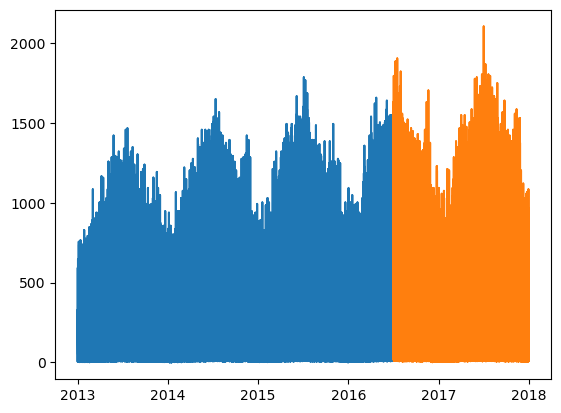

In [12]:
train_size = .70
n = store.shape[0]
test_start_index = round(train_size * n)

train = store[:test_start_index] # everything up (not including) to the test_start_index
test = store[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

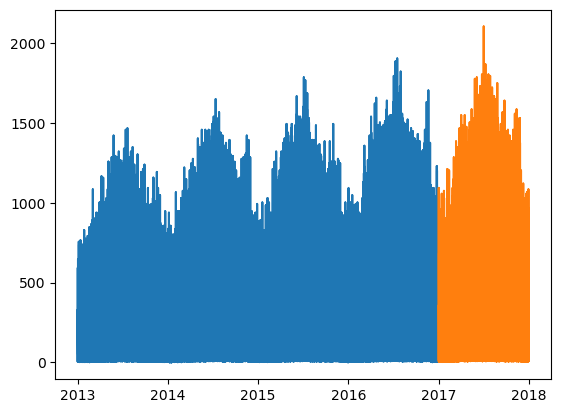

In [13]:
train = store.loc[:'2016']
test = store.loc['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

## OPSD Data

In [7]:
ops = prep_ops()

In [8]:
ops.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


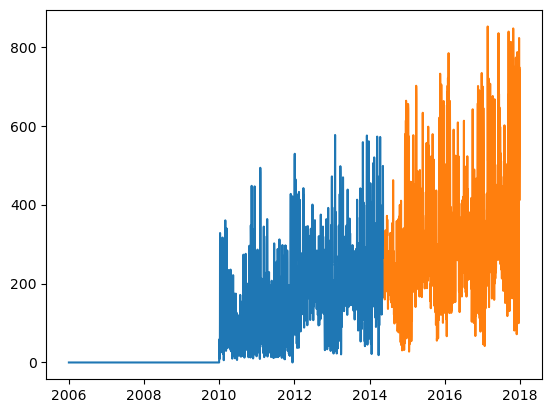

In [14]:
train_size = .70
n = ops.shape[0]
test_start_index = round(train_size * n)

train = ops[:test_start_index] # everything up (not including) to the test_start_index
test = ops[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.wind_and_solar)
plt.plot(test.index, test.wind_and_solar)

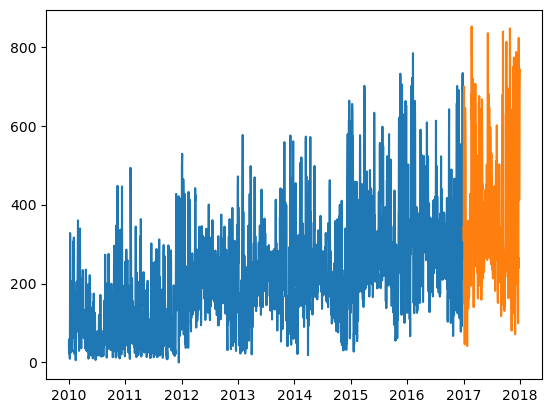

In [17]:
train = ops.loc['2010':'2016']
test = ops.loc['2017']

plt.plot(train.index, train.wind_and_solar)
plt.plot(test.index, test.wind_and_solar)